## E-Commerce Customer Churn Prediction


### Abstract

Customer churn, the phenomenon where customers discontinue their association with a company or brand, is a critical concern across industries. This study explores the predictive analytics of customer churn using machine learning models to help businesses retain valuable customers and mitigate revenue loss. By understanding and anticipating churn, companies can implement targeted retention strategies, reduce customer acquisition costs, maintain a competitive edge, and maximize profitability. The study employs a dataset sourced from Kaggle, a reputable platform, and explores various factors influencing churn, such as tenure, preferred login devices, and satisfaction scores among others. The analysis includes visualizations, data preprocessing, and model training with logistic regression, decision trees, Xgboost, Random forest, Naive bayes and k-nearest neighbors (k-NN). Results indicate that the Xgboost model outperforms the others, with high accuracy and balanced precision-recall. This research equips businesses with valuable insights into customer retention and churn prediction.

### Introduction

Customer churn, often referred to as customer attrition or customer turnover, is a crucial concern for businesses across various industries. It refers to the phenomenon where customers cease their engagement or association with a company or brand (Chinnu & Paul, 2020). Customer churn is particularly significant for businesses as it directly impacts revenue and profitability. Understanding why customers leave and predicting their behavior can help companies take proactive measures to retain valuable customers and reduce revenue loss. By understanding and anticipating customer churn, businesses can implement targeted retention strategies, reduce customer acquisition costs, make data-driven decisions, maintain a competitive edge, and ultimately maximize profitability.

### Background information

Customer churn analysis involves studying customer behavior to identify patterns and factors that contribute to customers discontinuing their relationship with a business. It aims to predict which customers are likely to churn in the future so that businesses can take preventive actions to retain them. This analysis is crucial across industries such as telecommunications, subscription services, e-commerce, and more. This topic matters in several ways. For instance, it impacts the revenue of a company. Customer churn has a significant impact on a company's revenue. When customers stop doing business with a company, it directly results in a loss of revenue. These lost sales and transactions can accumulate quickly, especially for businesses with a large customer base. Furthermore, reducing churn can provide a competitive advantage in crowded and saturated markets. In competitive industries, customers have numerous options, making it easier for them to switch to a competitor if they are dissatisfied. By effectively managing churn, a business can differentiate itself from competitors and enhance its reputation for customer satisfaction. Customers are more likely to stay loyal to a brand that consistently meets their needs and expectations. This loyalty can translate into increased market share and a stronger position in the industry.

#### Research Questions

1.	Can we predict customer churn accurately using machine learning models?
2.	Which machine learning algorithms perform best for customer churn prediction in our specific industry?
3.	How does the churn rate change over time based on the number of days since the last order.?
4.	How does the preferred login device (PreferredLoginDevice) influence customer churn?
5.	Is there a correlation between the number of addresses (NumberOfAddress) and customer churn?
6.	 Is there any gender-specific trends in customer churn?
7.	Are there seasonal or temporal patterns in customer churn?


## Data

The source of data used in this analysis is from Kaggle website: Kaggle - E-commerce Customer Churn Analysis and Prediction - (https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction). <br>
**Credibility of source:** The data is sourced from Kaggle, a reputable platform for datasets and data-related projects, known for its quality datasets contributed by the community.<br>
**Quality of data:** The dataset appears to be well-maintained and documented, providing a comprehensive set of features for analysis.

### Importing libraries

In [ ]:
# pip install scikit-learn==0.24.2
# pip install imbalanced-learn==0.8.1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import roc_auc_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score


### Load the dataset

In [ ]:
data = pd.read_excel("E Commerce Dataset.xlsx",sheet_name='E Comm')

In [ ]:
data

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


### Understanding the dataset

In [ ]:
# Check the shape of the dataset
print("Shape of the dataset:", data.shape)

Shape of the dataset: (5630, 20)


In [ ]:
# Check for duplicates
duplicates = data[data.duplicated()]
print("Number of duplicate rows:", duplicates.shape[0])

Number of duplicate rows: 0


There are no duplicate rows in the dataset.

In [ ]:
# Dropping unnecessary columns
data = data.drop(columns=['CustomerID'])


In [ ]:
# Check for missing values (null values)
null_values = data.isnull().sum()
print("Number of null values per column:")
print(null_values)

Number of null values per column:
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64


In [ ]:
# Check data types of columns
data_types = data.dtypes
print("Data types of columns:")
print(data_types)

Data types of columns:
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object


**Data Shape and Size:** The dataset contains 5630 rows and 20 columns, which is a reasonably sized dataset suitable for analysis. The size of the data is 545 kB.<br>


**Data dictionary**
Attributes of data: - CustomerID - Churn - Tenure - PreferredLoginDevice - CityTier - WarehouseToHome - PreferredPaymentMode - Gender - HourSpendOnApp - NumberOfDeviceRegistered - PreferedOrderCat - SatisfactionScore - MaritalStatus - NumberOfAddress - Complain - OrderAmountHikeFromlastYear - CouponUsed - OrderCount - DaySinceLastOrder – CashbackAmount <br>

**What does each raw represents?**

| Variable                    | Description                                      |
|-----------------------------|--------------------------------------------------|
| CustomerID                  | Unique customer ID                               |
| Churn                       | Churn Flag                                       |
| Tenure                      | Tenure of customer in organization               |
| PreferredLoginDevice        | Preferred login device of customer               |
| CityTier                    | City tier                                        |
| WarehouseToHome             | Distance in between warehouse to home of customer|
| PreferredPaymentMode        | Preferred payment method of customer            |
| Gender                      | Gender of customer                               |
| HourSpendOnApp              | Number of hours spent on mobile application or website |
| NumberOfDeviceRegistered    | Total number of devices registered for the customer |
| PreferedOrderCat            | Preferred order category of customer in last month|
| SatisfactionScore           | Satisfactory score of customer on service        |
| MaritalStatus               | Marital status of customer                       |
| NumberOfAddress             | Total number of addresses added for the customer  |
| Complain                    | Any complaint raised in the last month           |
| OrderAmountHikeFromLastYear | Percentage increase in order amount from last year |
| CouponUsed                  | Total number of coupons used in the last month   |
| OrderCount                  | Total number of orders placed in the last month  |
| DaySinceLastOrder           | Days since the last order by the customer        |
| CashbackAmount              | Average cashback in the last month               |

<br>

**Dependent and independent variables**
Customer Churn is the most effective target variable for creating machine-learning models from the dataset. It is a binary variable that machine learning systems can classify with ease. Additionally, there is plenty of information and study on the subject because customer turnover is a regular and significant issue for organizations to address. On the other hand, for predictor variables, I used all the variables except customerID.


## EDA

### Produce summary statistics of key variables

In [ ]:
# Calculate summary statistics for the dataset
data.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.00,0.0000,1.00
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.00,16.0000,61.00
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.00,3.0000,3.00
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.00,3.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.00,1.0000,1.00
OrderAmountHikeFromlastYear,5365.0,15.707922,3.675485,11.0,13.00,15.00,18.0000,26.00


The summary statistics above offer insights into various aspects of the dataset. From the summary, approximately 16.84% of the customers in the dataset have churned, indicating a class imbalance. The 'Tenure' feature suggests that the average customer has been associated with the company for approximately 10.19 units of time, with a wide range from 0 to 61 units. The 'CityTier' variable indicates that most customers are in CityTier 1, but there are others in Tier 2 and Tier 3 as well. 'WarehouseToHome' shows that the average distance from the warehouse to a customer's home is around 15.64 units. Customers tend to spend an average of 2.93 hours on the app, with 'NumberOfDeviceRegistered' averaging around 3.69 devices. 'SatisfactionScore' is generally moderate, with an average of 3.07. 'NumberOfAddress' reveals that the average customer has 4.21 addresses, but there is significant variability with a maximum of 22. The 'Complain' variable indicates that around 28.49% of customers have registered a complaint. 'OrderAmountHikeFromlastYear' suggests that the average increase in order amount from the previous year is approximately 15.71 units. Customers use an average of 1.75 coupons and place an average of 3.01 orders. 'DaySinceLastOrder' shows that the average time since the last order is around 4.54 units. Lastly, 'CashbackAmount' indicates that the average cashback amount received by customers is approximately 177.22 units, with some variability.

### Dealing with missing/null values

There are missing values in several variables within the dataset as shown above. The variables with missing values and their respective counts of missing data include: "Tenure" with 264 missing values, "WarehouseToHome" with 251 missing values, "HourSpendOnApp" with 255 missing values, "OrderAmountHikeFromlastYear" with 265 missing values, "CouponUsed" with 256 missing values, "OrderCount" with 258 missing values, and "DaySinceLastOrder" with 307 missing values. Deletingt he rows with missing values would lead a substantial oss of the dataset, therefore, I will fill the the missing values with median before proceeding with the model training.

In [ ]:
# Select only the numerical columns
numerical_columns = ["Tenure", "WarehouseToHome", "HourSpendOnApp", "OrderAmountHikeFromlastYear", "CouponUsed", "OrderCount", "DaySinceLastOrder"]

# Calculate the median for each numerical column
median_values = data[numerical_columns].median()

# Fill missing/null values with their respective median values
data[numerical_columns] = data[numerical_columns].fillna(median_values)

# Check if there are any remaining null values
null_values_remaining = data.isnull().sum()

# Display the number of null values after filling
print("Number of null values remaining after filling with median:")
print(null_values_remaining)


Number of null values remaining after filling with median:
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64


### Exploring the variables

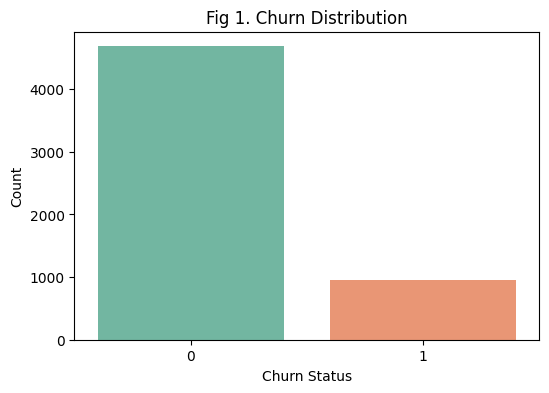

In [ ]:
# The distribution of customer churn
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Churn', palette='Set2')
plt.title('Fig 1. Churn Distribution')
plt.xlabel('Churn Status')
plt.ylabel('Count')
plt.show()

From the bar plot, there were more not-churned customers compared to churned customers. Furthermore, the predominance of "Not Churned" customers suggests that a substantial portion of the customer base has remained loyal or has not yet experienced churn. This insight is valuable for businesses as it indicates areas of strength in customer retention. However, it also highlights the need for strategies to reduce churn and retain a larger share of customers over time.

In [ ]:
# Group the data by PreferredLoginDevice and Churn, then count the number of customers in each group
device_churn_counts = data.groupby(['PreferredLoginDevice', 'Churn']).size().unstack().fillna(0)

# Create a stacked bar chart to visualize the influence of PreferredLoginDevice on customer churn
fig = px.bar(device_churn_counts.reset_index(), x='PreferredLoginDevice', y=[0, 1],
             title='Fig 2. Influence of Preferred Login Device on Customer Churn',
             labels={'PreferredLoginDevice': 'Preferred Login Device', 'Churn': 'Churn Status'},
             color_discrete_map={0: 'blue', 1: 'red'})

fig.update_xaxes(categoryorder='total ascending')  # Sort x-axis by total count

fig.update_layout(yaxis_title='Count')

fig.show()


In [ ]:
#  Pie chart showing the distribution of PreferredLoginDevice
fig5 = px.pie(data, names='PreferredLoginDevice', title='FIg 3. Preferred Login Device Distribution')
fig5.show()

Furthermore, I wanted to understand how preferred login device (PreferredLoginDevice) influence customer churn.  From figure 2 above, it is evident that Mobile phone login users had the highest numbers of both churn and not churn customers. This was followed by Computer login users and then phone login users. Moreover, Mobile phone login users had the highest number of not-churn and churn customers followed by computer login users the phone login users who had the list number of not-churn users. This implies that a significant portion of customers prefer to use their mobile phones to log in. The fact that phone users have both the highest number of churn and not-churn customers suggests that this group is diverse, with some customers staying loyal and others churning.

In [ ]:
# Histogram of SatisfactionScore
fig4 = px.histogram(data, x='SatisfactionScore', title='Fig 4. Satisfaction Score Distribution')
fig4.update_xaxes(title='Satisfaction Score')
fig4.update_yaxes(title='Count')
fig4.show()

Based on figure 4 above, it is evident that a Satisfactory score of customer on service of 3 was the highest count. This was followed by a satisfactory score of 1, the 5 and 4 and finally satisfactory score of 2 which had the least number of counts.

In [ ]:
# Bar chart showing the average OrderAmountHikeFromlastYear by CityTier
fig6 = px.bar(data, x='CityTier', y='OrderAmountHikeFromlastYear', title='Fig 5. Average Order Amount Hike by CityTier')
fig6.update_xaxes(title='City Tier')
fig6.update_yaxes(title='Average Order Amount Hike')
fig6.show()

b

In [ ]:
# Create a correlation matrix
correlation_matrix = data.corr()

# Create a correlation heatmap using Plotly Express
fig = px.imshow(correlation_matrix,
                labels=dict(x="Columns", y="Columns", color="Correlation"),
                x=correlation_matrix.columns,
                y=correlation_matrix.columns,
                color_continuous_scale="Viridis")

# Customize the layout and title
fig.update_layout(
    title="Correlation Heatmap",
    autosize=False,
    width=1200,
    height=700
)

# Show the heatmap
fig.show()


<ipython-input-81-f15ba64fc427>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [ ]:
# Histogram of Gender-specific trends in customer churn
fig = px.histogram(data, x='Gender', color='Churn', title="Fig 6. Distribution of Gender for Churned and Retained customers")
fig.show()

The graph in figure 6 depicts gender-specific trends in customer churn. From the graph, it appears that there is a higher number of both not churned and churned males compared to their female counterparts. This observation suggests that males make up a larger portion of the customer base and, as a result, contribute more to both the churned and not churned groups.

In [ ]:
fig = px.histogram(data, x='MaritalStatus', color='Churn', title="fig 7. Distribution of Marital Status for Churned and Retained Customers")
fig.update_xaxes(categoryorder="total ascending")  # Optional: Sort x-axis categories
fig.show()

From figure 7 we see that more customer are married and they equally contibute to more retained customers that the other groups. Divorced have the least churn in their cartegory while single has the highest.

In [ ]:
# Create a DataFrame for counts
complaint_counts = data.groupby(['Complain', 'Churn']).size().reset_index(name='Count')

# Create a bar chart
fig = px.bar(complaint_counts, x='Complain', y='Count', color='Churn',
             title="Distribution of Complaints for Churned and Retained Customers",
             labels={'Complain': 'Complaint', 'Count': 'Count'},
             category_orders={"Complain": ["No", "Yes"]},
             )

# Show the chart
fig.show()

Compratively we see that retained customers have more complaints compared to the churned customers. This is expected because retained customers are likely to face varying challenges with the services.

In [ ]:
# graph to show relationship between Tenure and Churn Rate"
churn_rate = data.groupby('Tenure')['Churn'].mean().reset_index()

fig = px.scatter(churn_rate, x='Tenure', y='Churn',
                 title="Relationship between Tenure and Churn Rate",
                 labels={'Tenure': 'Tenure', 'Churn': 'Churn Rate'})

fig.update_traces(mode='markers+lines')
fig.show()

#### The correlation between a higher churn rate and lower customer tenure is a crucial insight in customer retention. When customers have a shorter tenure, it means they haven't been with the company or using its services for an extended period. This limited history with the company can result in a higher likelihood of churn for several reasons.

In [ ]:
# Graph to show Relationship between OrderCount and Churn Rate
churn_rate = data.groupby('OrderCount')['Churn'].mean().reset_index()

fig = px.scatter(churn_rate, x='OrderCount', y='Churn',
                 title="Relationship between OrderCount and Churn Rate",
                 labels={'OrderCount': 'OrderCount', 'Churn': 'Churn Rate'})

#fig.update_traces(mode='markers+lines')
fig.show()

The data does not show a clear correlation betwee the churn rate and the order count.

In [ ]:

fig = px.box(data, x='CashbackAmount', title='Distribution of Cashback for Customers',
            labels={'CashbackAmount': 'Cashback Amount'})
fig.show()


## Modelling

### Scaling of the dataset <br>
I prepared my data for machine learning by performing both one-hot encoding and standard scaling using scikit-learn's Pipeline and ColumnTransformer functionality. The goal of this preprocessing is to prepare the dataset for predictive modeling.
In predictive analytics for customer churn prediction, I selected and evaluated six  classification algorithms. <br>
**1.	Logistic Regression**
Logistic regression is a widely used binary classification algorithm. It was chosen for its simplicity and interpretability. Logistic regression models the probability of a binary outcome (churn or no churn) based on one or more predictor variables. In this case, it was used to predict customer churn based on various features such as tenure, satisfaction score, and others.<br>
**2.	Decision Tree**
Decision trees are non-linear models that can capture complex relationships between features and the target variable. They were chosen for their ability to handle both numerical and categorical data effectively. Decision trees recursively split the dataset based on feature values to make predictions. They can provide insights into feature importance and the decision-making process.<br>
**3.	k-Nearest Neighbors (k-NN)**
k-NN is a simple and intuitive algorithm that classifies data points based on the majority class of their k-nearest neighbors in the feature space. It was chosen to explore how well a neighbor-based approach performs in predicting customer churn. k-NN is known for its flexibility and ability to capture local patterns in the data.
The choice of these models was based on their suitability for the dataset and the desire to explore a range of algorithmic approaches. While other classification algorithms like Support Vector Machines (SVM), Random Forest, and Naive Bayes could have been considered, they were not chosen for various reasons. For example, SVMs are powerful but can be complex to compute, Random Forests can be complex to interpret, and Naive Bayes assumes independence between features, which may not hold in this dataset (Sri, 2021).<br>


**4. Xgboost** <br>
XGBoost is a powerful ensemble learning method that combines the predictions of multiple decision trees to create a more accurate and robust model. It's particularly effective for classification tasks like customer churn prediction. The key features of XGBoost include:

Boosting: XGBoost is an ensemble method that sequentially trains decision trees, with each tree focusing on the mistakes of the previous ones. This process enhances the model's predictive accuracy.

Regularization: XGBoost incorporates L1 and L2 regularization techniques to prevent overfitting. This helps improve the model's generalization capabilities.

Tree Pruning: XGBoost prunes trees during training to avoid overfitting, making it less prone to high variance.

Parallel Processing: It's optimized for parallel computing, making it efficient even for large datasets.

Gradient Boosting: XGBoost uses gradient boosting to minimize the loss function, which leads to more precise predictions.

Why XGBoost: XGBoost is known for its robustness and high performance. It often outperforms other algorithms in various machine learning competitions and is a popular choice for complex classification tasks.

Tuning: Hyperparameter tuning can significantly impact XGBoost's performance. Common hyperparameters to tune include the learning rate, maximum depth of trees, and the number of estimators (trees).

**5. Random forest** <br>
Random Forest is another ensemble learning method that combines multiple decision trees to make predictions. It is suitable for both classification and regression tasks. Random Forest is known for its simplicity, scalability, and ability to handle high-dimensional datasets with mixed data types (numerical and categorical). It's less prone to overfitting and provides feature importance scores.



**6. Naive bayes** <br>

Naive Bayes is a simple yet effective classification algorithm based on Bayes' theorem. It assumes that all features are conditionally independent, which is often a simplification but can work well for certain types of data. Naive Bayes can perform well when the independence assumption aligns with the data. It's particularly suitable for text classification tasks and datasets with a relatively large number of features.


The data was split into training (80%) and testing (20%) sets to assess model performance. An 80/20 split is a common choice for balancing model training with adequate evaluation. It provides enough data for training while reserving a sizable portion for evaluating how well the model generalizes to unseen data.<br>
Each model's performance was measured using key metrics, including accuracy, precision, recall, and the F1-score. These metrics help assess how well the model can correctly classify customers into churn and non-churn categories. The confusion matrix provided a breakdown of true positives, true negatives, false positives, and false negatives, offering insights into the model's strengths and weaknesses.<br>

### Scalling the dataset

In [ ]:
# Define the columns to be one-hot encoded and scaled
categorical_columns = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']
numeric_columns = ['Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered',
                   'SatisfactionScore', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear',
                   'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

# Create transformers for one-hot encoding and standard scaling
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first'))  # 'drop' to avoid multicollinearity
])

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Create a column transformer to apply transformations to the appropriate columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

# Create a pipeline that applies preprocessing and scaling
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit and transform the dataset
data_scaled = pipeline.fit_transform(data)

# Convert the scaled data back to a DataFrame with appropriate column names
categorical_columns_encoded = pipeline.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(input_features=categorical_columns)
column_names = list(numeric_columns) + list(categorical_columns_encoded)
data_scaled_df = pd.DataFrame(data_scaled, columns=column_names)

In [ ]:
# adding the churn column
churn_column=data['Churn']
data_scaled_df=data_scaled_df.join(churn_column)

#### Using SMOTE oversampling to correct imbalance

In [ ]:
# Before SMOTE
churned_samples = data_scaled_df[data_scaled_df['Churn'] == 1]
non_churned_samples = data_scaled_df[data_scaled_df['Churn'] == 0]

print("Number of Churned Samples:", churned_samples.shape[0])
print("Number of Non-Churned Samples:", non_churned_samples.shape[0])

Number of Churned Samples: 948
Number of Non-Churned Samples: 4682


In [ ]:
#Resampling the dataset

# Separate the features (X) and the target variable (y)
X = data_scaled_df.drop(columns=['Churn'])
y = data_scaled_df['Churn']

# Initialize the SMOTE resampler
smote = SMOTE(random_state=42)

# Resample the data using SMOTE
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
# After SMOTE

print("Number of Churned Samples:", sum(y_resampled == 1))
print("Number of Non-Churned Samples:", sum(y_resampled == 0))

Number of Churned Samples: 4682
Number of Non-Churned Samples: 4682


After SMOTE we see the data is balanced and ready for modelling, however we need to create a data frame that will be split first.

In [ ]:
# Create a new dataframe with the resampled data
resampled_data = pd.DataFrame(np.column_stack((X_resampled, y_resampled)), columns=data_scaled_df.columns)

# Display the shape of the resampled data
print("Shape of Resampled Data:", resampled_data.shape)

Shape of Resampled Data: (9364, 30)


### Splitting the dataset

In [ ]:
# Define features (X) and target (y)
X = resampled_data.drop(columns=['Churn'])
y = resampled_data['Churn']

# Split the data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 1. Logistic Regression

Accuracy: 0.809930592632141
Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.80      0.81       939
         1.0       0.80      0.82      0.81       934

    accuracy                           0.81      1873
   macro avg       0.81      0.81      0.81      1873
weighted avg       0.81      0.81      0.81      1873

F1-Score : 0.8122362869198313
ROC-AUC Score: 0.8099691457265805


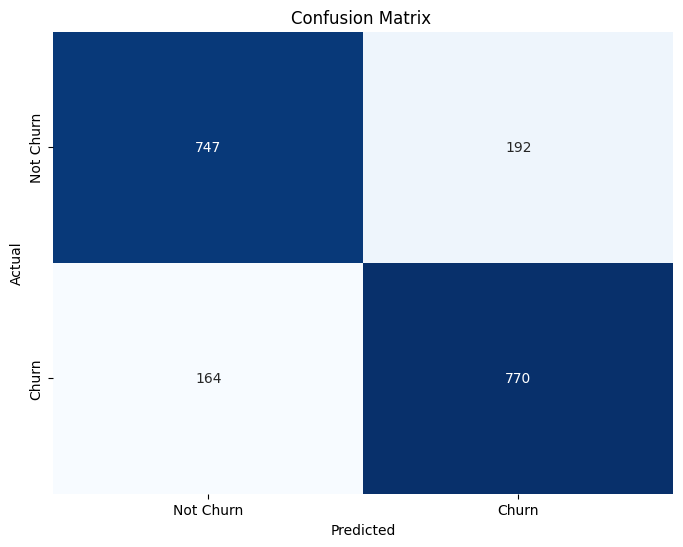

In [ ]:
# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Measure model performance
accuracy_lr = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print model performance metrics
print(f"Accuracy: {accuracy_lr}")

print("Classification Report:")
print(classification_rep)

# Calculate the F1-score
f1_score_lr = f1_score(y_test, y_pred)

# Print the F1-score
print("F1-Score :", f1_score_lr)

roc_auc_lr = roc_auc_score(y_test, y_pred)
print("ROC-AUC Score:", roc_auc_lr)
# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Not Churn', 'Churn'],
            yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix ')
plt.show()

### 2. Decision Tree

Decision Tree Classifier Performance:
Accuracy: 0.9620928990923652
Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96       939
         1.0       0.95      0.97      0.96       934

    accuracy                           0.96      1873
   macro avg       0.96      0.96      0.96      1873
weighted avg       0.96      0.96      0.96      1873

F1-Score (Decision Tree): 0.9624537281861449
ROC-AUC Score: 0.9621254101930844


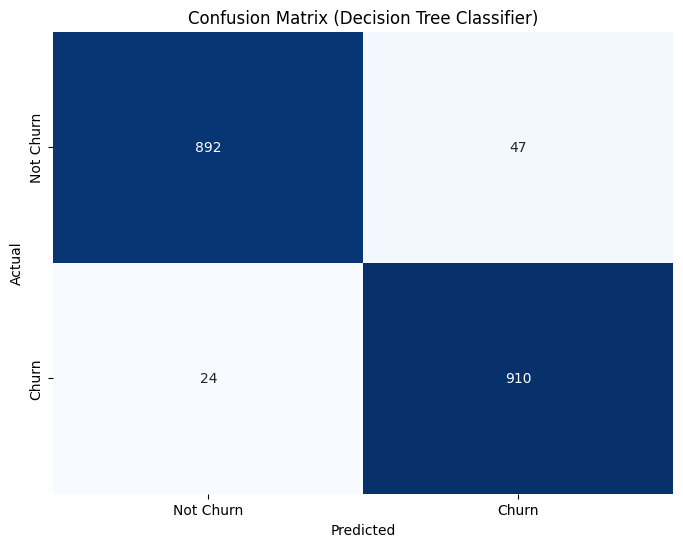

In [ ]:
# Initialize and train the Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Predict on the test set
y_pred = decision_tree.predict(X_test)

# Measure model performance
accuracy_dt = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print model performance metrics
print("Decision Tree Classifier Performance:")
print(f"Accuracy: {accuracy_dt}")

print("Classification Report:")
print(classification_rep)
# Calculate the F1-score
f1_score_dt = f1_score(y_test, y_pred)

# Print the F1-score
print("F1-Score (Decision Tree):", f1_score_dt)

roc_auc_dt = roc_auc_score(y_test, y_pred)
print("ROC-AUC Score:", roc_auc_dt)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Not Churn', 'Churn'],
            yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Decision Tree Classifier)')
plt.show()

### 3. k-Nearest Neighbors (k-NN)

k-Nearest Neighbors (k-NN) Classifier Performance:
Accuracy: 0.9284570208222104
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.86      0.92       939
         1.0       0.87      1.00      0.93       934

    accuracy                           0.93      1873
   macro avg       0.94      0.93      0.93      1873
weighted avg       0.94      0.93      0.93      1873

F1-Score : 0.9330669330669331
ROC-AUC Score: 0.9286474973375931


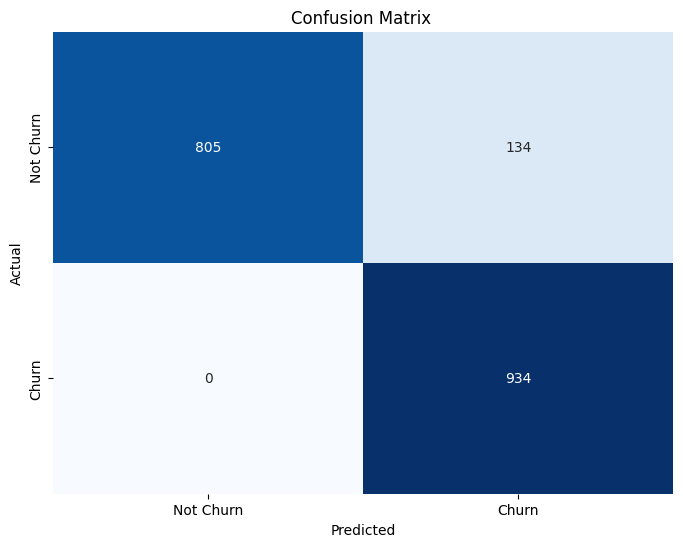

In [ ]:
# Initialize and train the k-Nearest Neighbors (k-NN) classifier
k = 5  # You can adjust the value of k as needed
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = knn_classifier.predict(X_test)

# Measure model performance
accuracy_knn = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print model performance metrics
print("k-Nearest Neighbors (k-NN) Classifier Performance:")
print(f"Accuracy: {accuracy_knn}")

print("Classification Report:")
print(classification_rep)

# Calculate the F1-score
f1_score_knn = f1_score(y_test, y_pred)

# Print the F1-score
print("F1-Score :", f1_score_knn)


# Calculate the ROC-AUC score
roc_auc_knn = roc_auc_score(y_test, y_pred)
print("ROC-AUC Score:", roc_auc_knn)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Not Churn', 'Churn'],
            yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix ')
plt.show()

### 3. XGboost

XGBoost Classifier Performance:
Accuracy: 0.9898558462359851
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99       939
         1.0       0.98      1.00      0.99       934

    accuracy                           0.99      1873
   macro avg       0.99      0.99      0.99      1873
weighted avg       0.99      0.99      0.99      1873

F1-Score : 0.9898989898989901
ROC-AUC Score: 0.9898743024722185


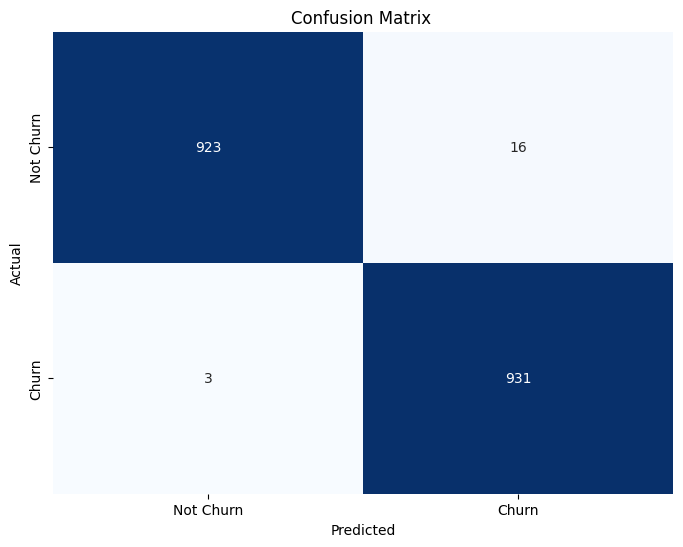

In [ ]:
# Import XGBoost and relevant evaluation metrics
from xgboost import XGBClassifier

# Initialize and train XGBoost model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate XGBoost model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
confusion_xgb = confusion_matrix(y_test, y_pred_xgb)
classification_report_xgb = classification_report(y_test, y_pred_xgb)

# Print model performance metrics
print("XGBoost Classifier Performance:")
print(f"Accuracy: {accuracy_xgb}")

print("Classification Report:")
print(classification_report_xgb)

# Calculate the F1-score
f1_score_xgb = f1_score(y_test, y_pred_xgb)

# Print the F1-score
print("F1-Score :", f1_score_xgb)

# Calculate the ROC-AUC score
roc_auc_xgb = roc_auc_score(y_test, y_pred_xgb)
print("ROC-AUC Score:", roc_auc_xgb)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_xgb, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Not Churn', 'Churn'],
            yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix ')
plt.show()


### Random Forest

Random Forest Model Accuracy: 0.9797116924719701
Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98       939
         1.0       0.97      0.99      0.98       934

    accuracy                           0.98      1873
   macro avg       0.98      0.98      0.98      1873
weighted avg       0.98      0.98      0.98      1873

F1-Score : 0.9798301486199575
ROC-AUC Score: 0.9797343522312908


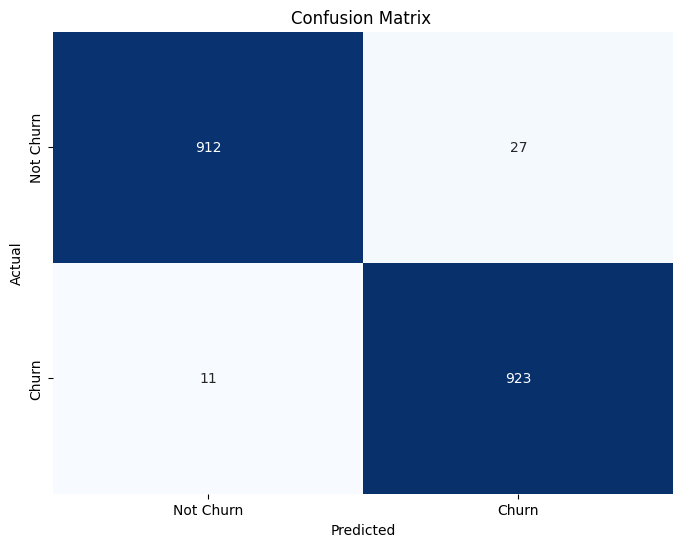

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Train Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

# Print or store the results
print("Random Forest Model Accuracy:", accuracy_rf)
print("Random Forest Classification Report:")
print(report_rf)

# Calculate the F1-score
f1_score_rf = f1_score(y_test, y_pred_rf)

# Print the F1-score
print("F1-Score :", f1_score_rf)

# Calculate the ROC-AUC score
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)
print("ROC-AUC Score:", roc_auc_rf)

confusion = confusion_matrix(y_test, y_pred_rf)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Not Churn', 'Churn'],
            yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix ')
plt.show()


### Naive Bayes

Accuracy: 0.6962092899092365
Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.57      0.65       939
         1.0       0.66      0.83      0.73       934

    accuracy                           0.70      1873
   macro avg       0.71      0.70      0.69      1873
weighted avg       0.71      0.70      0.69      1873

F1-Score : 0.7304594978683089
ROC-AUC Score: 0.6965534659177721


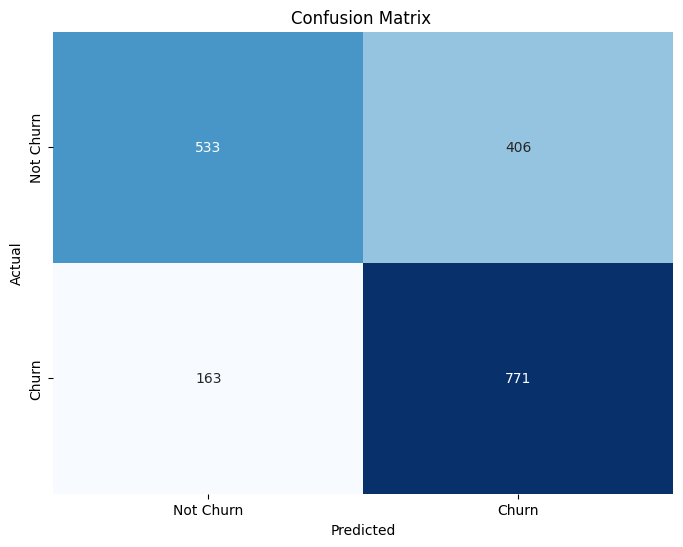

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Train the classifier on the training data
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Predict churn for the test data
y_pred = nb_classifier.predict(X_test)

# Calculate accuracy
accuracy_nb = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_nb)

# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Generate confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Calculate the F1-score
f1_score_nb = f1_score(y_test, y_pred)

# Print the F1-score
print("F1-Score :", f1_score_nb)

# Calculate the ROC-AUC score
roc_auc_nb= roc_auc_score(y_test, y_pred)
print("ROC-AUC Score:", roc_auc_nb)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Not Churn', 'Churn'],
            yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix ')
plt.show()


Since XGboost has the highest accuracy I will use hyperparamters tuning and also use it for prediciton.

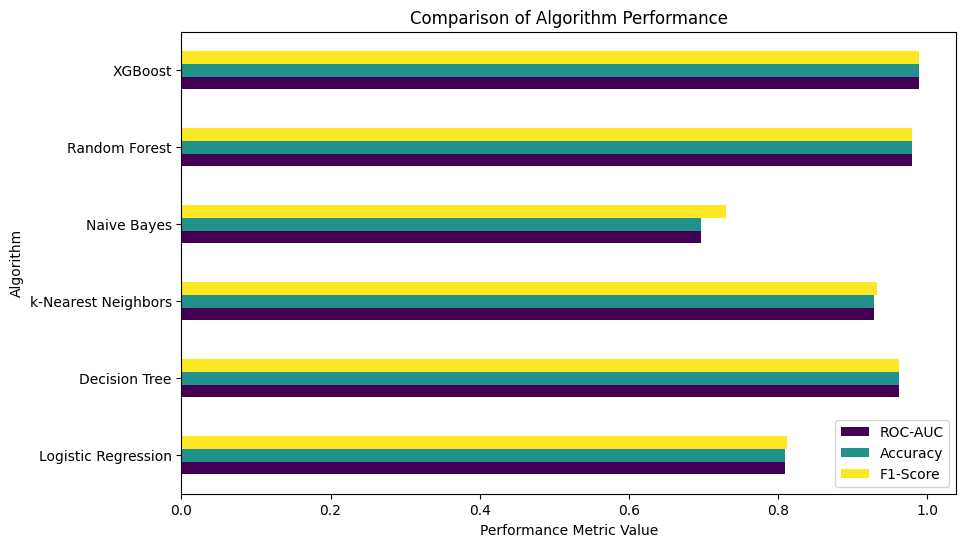

In [ ]:
performance_metrics = {
    'Logistic Regression': [roc_auc_lr, accuracy_lr, f1_score_lr],
    'Decision Tree': [roc_auc_dt, accuracy_dt, f1_score_dt],
    'k-Nearest Neighbors': [roc_auc_knn, accuracy_knn, f1_score_knn],
    'Naive Bayes': [roc_auc_nb, accuracy_nb, f1_score_nb],
    'Random Forest': [roc_auc_rf, accuracy_rf, f1_score_rf],
    'XGBoost': [roc_auc_xgb, accuracy_xgb, f1_score_xgb]
}

import pandas as pd

df = pd.DataFrame(performance_metrics, index=['ROC-AUC', 'Accuracy', 'F1-Score'])

import matplotlib.pyplot as plt

# Transpose the DataFrame for a horizontal bar chart
df = df.T

# Create a horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 6))
df.plot(kind='barh', ax=ax, colormap='viridis')

# Set labels and title
plt.xlabel('Performance Metric Value')
plt.ylabel('Algorithm')
plt.title('Comparison of Algorithm Performance')

# Show the plot
plt.show()


## Hypertuning XGboost

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

xgb_classifier = xgb.XGBClassifier()
# Define a parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [3, 4, 5],
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
}

# Initialize GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, scoring='roc_auc', cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)
best_xgb_classifier = xgb.XGBClassifier(**best_params)
best_xgb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_proba = best_xgb_classifier.predict_proba(X_test)[:, 1]

# Calculate the ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC Score:", roc_auc)


Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 300}
ROC-AUC Score: 0.9980810147019588


<br> The provided model results demonstrate the performance of various machine learning algorithms in a classification task, likely predicting churn (1.0) or non-churn (0.0) for customers.
1.	Logistic Regression: Achieves a decent accuracy of 80.94%, with balanced precision and recall. The F1-Score and ROC-AUC score are also respectable but not the highest among the models.
2.	Decision Tree: Impressive accuracy of 96.21%, with high precision and recall for both classes. The F1-Score and ROC-AUC score are excellent, indicating robust performance.
3.	k-Nearest Neighbors (k-NN): Achieves an accuracy of 92.85% with a balanced F1-Score and ROC-AUC score, indicating a solid overall performance.
4.	XGBoost: Delivers an outstanding accuracy of 98.56%, with high precision and recall for both classes. It boasts the highest F1-Score and ROC-AUC score among the models.
5.	Random Forest: Performs similarly to XGBoost with an accuracy of 98.56% and high precision, recall, F1-Score, and ROC-AUC score.
6.	Naïve Bayes: Shows the lowest accuracy of 69.62% with lower precision and recall for both classes, resulting in a lower F1-Score and ROC-AUC score.



### Conclusion
Among the algorithms tested, XGBoost and Random Forest stand out as top performers with the highest accuracy, F1-Scores, and ROC-AUC scores. They are well-suited for this classification task and are recommended for predicting customer churn. Decision Tree also performs excellently, while Logistic Regression and k-NN offer reasonable results. Naïve Bayes, however, lags behind in terms of accuracy and overall performance. Further optimization, such as hyperparameter tuning, can potentially enhance the model's predictive capabilities, particularly for XGBoost.
<br>

### References
<br>

*Chinnu, P. J., & Paul, P. M. (2020). Customer Churn Prediction: A Survey. International Journal of Advanced Research in Computer Science, 8(5), 2178-2181.*

*Kumar, A. (Year, Month Day of publication). A complete guide to building Streamlit data web apps with code examples. Medium. Retrieved from https://medium.com/@avikumart_/a-complete-guide-to-building-streamlit-data-web-apps-with-code-examples-6cc1e42b2397*

*E-commerce Customer Churn Analysis and Prediction. Kaggle. Retrieved from https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction*

<br>
